In [1]:
import sys
import time

import numpy as np
import scipy.sparse as sp
from scipy.integrate import solve_ivp
from scipy.linalg import expm as expm
import matplotlib.pyplot as plt

sys.path.append('./../lib')
from intertrain import Intertrain
from solver import Solver as Solver

from IPython.core.display import HTML
with open( './style.css', 'r' ) as f: st = f.read()
HTML('<style>%s</style>' %st)

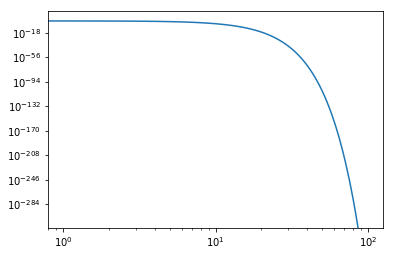

In [16]:
x = np.arange(100)
y = np.exp(-x*x/10)
plt.plot(x, y)
plt.semilogx()
plt.semilogy()
plt.show()

$$
    d x = f(x, t) \, d t,
    \quad
    x \in R^{1},
    \quad
    x_0 = [2],
    \quad
    f(x, t) = x^2,
$$
analytic solution
$$
    x(t) = \frac{x_0}{1 - x_0 t}.
$$

In [2]:
def func_f0(x, t):
    return x*x

def func_xt(t, x0):
    return x0 / (1. - x0 * t)

d = 1
t0 = 0.
t = 0.1

def func_x(t, v):
    x = v.reshape(d, -1)
    f0 = func_f0(x, t)
    res = f0
    return res

X0 = np.array([-1., -2., -3.]).reshape(1, -1)

X = np.zeros(X0.shape)
for j in range(X0.shape[1]):
    y1 = X0[:, j]
    y2 = solve_ivp(func_x, [t0, t], y1).y[:, -1]
    X[:, j] = y2

X_calc = X

X_real = np.zeros(X.shape)
for j in range(X0.shape[1]):
    X_real[:, j] = func_xt(t, X0[:, j])
    
e = np.mean(np.abs((X_real - X_calc) / X_real))
print(e)

2.6455192540951625e-07


In [10]:
def func_f0(x, t):
    e = np.ones(x.shape[1])
    v_1 = np.cos(t) * e
    v_2 = -np.sin(2. * t) * e
    return np.vstack([v_1, v_2])

def func_xt(t, x0):
    e = np.ones(x0.shape[1])
    v_1 = x0[0, :] + np.sin(t) * e 
    v_2 = x0[1, :] + np.cos(t)**2 * e - 1.
    return np.vstack([v_1, v_2])

def func(t, v):
    x = v.reshape(d, -1)
    f0 = func_f0(x, t)
    res = f0[:, 0]
    return res

d = 2
t = 1.

X0 = np.array([
    np.arange(10) * 1.4,
    np.arange(10) * 2.4,
])

X = np.zeros(X0.shape)
for j in range(X0.shape[1]):
    y1 = X0[:, j]
    y2 = solve_ivp(func, [0., t], y1).y[:, -1]
    X[:, j] = y2

X_calc = X
X_real = func_xt(t, X0)
e = np.mean(np.abs((X_real - X_calc) / X_real))
print(e)  

ValueError: `y0` must be 1-dimensional.

In [ ]:
from scipy.optimize import curve_fit

x = np.array([399.75, 989.25, 1578.75, 2168.25, 2757.75, 3347.25, 3936.75, 4526.25, 5115.75, 5705.25])
y = np.array([109,62,39,13,10,4,2,0,1,2])

def func(x, a, b, c, d):
    return a*np.exp(-c*(x-b))+d

popt, pcov = curve_fit(func, x, y, [100, 400, 0.001, 0])
print (popt)

plt.plot(x,y)
x = np.linspace(400,6000,10000)
plt.plot(x,func(x, *popt))
plt.show()